In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.utils import plot_model

In [13]:
vocabulary_size = 50000
num_income_groups = 10

In [14]:
posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(256, vocabulary_size)(posts_input)

x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

age_prediction = layers.Dense(1, name='age')(x)
income_prediction = layers.Dense(num_income_groups, activation='softmax', name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)

model = Model(posts_input, [age_prediction, income_prediction, gender_prediction])

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 50000)  12800000    posts[0][0]                      
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, None, 128)    32000128    embedding_1[0][0]                
__________________________________________________________________________________________________
max_pooling1d_2 (MaxPooling1D)  (None, None, 128)    0           conv1d_5[0][0]                   
____________________________________________________________________________________________

In [16]:
model.compile(optimizer='rmsprop',
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])

In [17]:
model.compile(optimizer='rmsprop',
              loss={'age': 'mse', 
                    'income': 'categorical_crossentropy', 
                    'gender': 'binary_crossentropy'})

In [18]:
model.compile(optimizer='rmsprop',
              loss=['mse', 'categorical_crossentropy','binary_crossentropy'], 
              loss_weights=[0.25, 1., 10.])

In [19]:
model.compile(optimizer='rmsprop', 
              loss={'age': 'mse',
                    'income': 'categorical_crossentropy',
                    'gender': 'binary_crossentropy'},
              loss_weights={'age': 0.25, 'income': 1., 'gender': 10.})

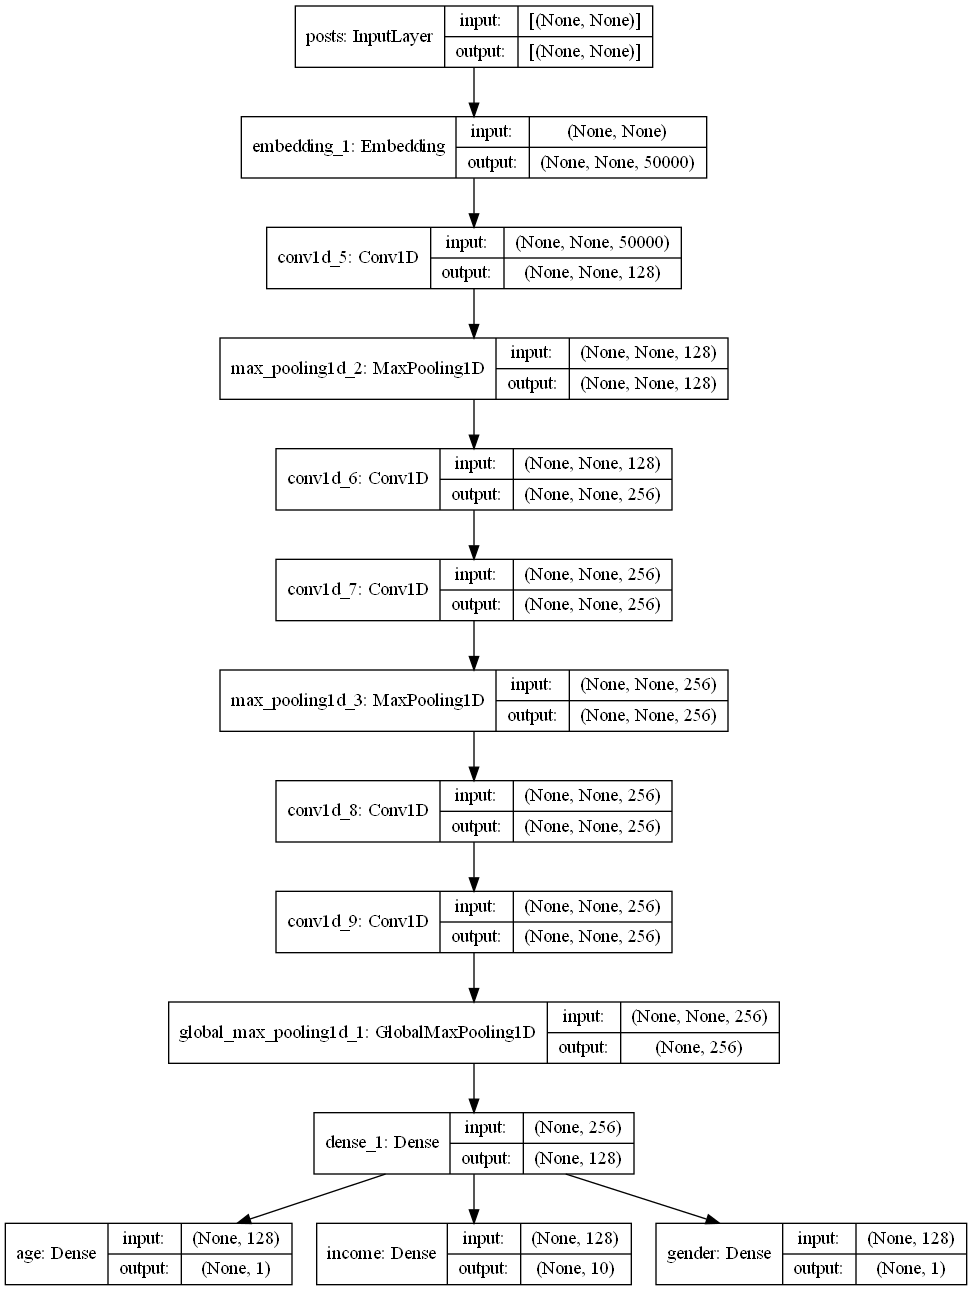

In [20]:
plot_model(model, to_file='multi_output_model.png', show_shapes=True)

In [21]:
# model.fit(posts, 
#           [age_targets, income_targets, gender_targets], 
#           epochs=10, 
#           batch_size=64)

In [22]:
# model.fit(posts, 
#           {'age': age_targets, 'income': income_targets, 'gender': gender_targets}, 
#           epochs=10, 
#           batch_size=64)